In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

In [6]:
print(llm.invoke("What is the capital of France?").content)

<think>
Okay, so I need to figure out what the capital of France is. Hmm, I think I remember learning this in school, but I'm not entirely sure. Let me try to recall. I know that France is a country in Europe, and I've heard of a few cities there. Paris comes to mind, but I'm not 100% certain if that's the capital or just a major city. 

Wait, I think Paris is the capital. But I should double-check to make sure I'm not mixing it up with another country. For example, I know that London is the capital of England, and Berlin is the capital of Germany. So, Paris being the capital of France makes sense because it's one of the most well-known cities in the world. 

Also, I remember seeing the Eiffel Tower in pictures, and I associate that with Paris. I think government buildings and embassies are usually in the capital, so that would make sense. I don't think any other city in France is as prominent as Paris. Maybe Lyon or Marseille, but those don't sound like capitals. 

I guess another way

In [7]:
print(llm.invoke("What is the capital of india tell me in detail?").content)

<think>
Okay, so I need to figure out the capital of India. Hmm, I'm not entirely sure, but I think it's either Mumbai or Delhi. Wait, I remember hearing something about Delhi being the capital. But I'm not 100% certain. Let me think about this step by step.

First, I know that India is a country in South Asia. It's a big country with a lot of people and a rich history. I've heard of cities like Mumbai, Delhi, Bangalore, and Kolkata. Mumbai is a major city, often associated with the film industry, Bollywood. Delhi, on the other hand, I think is more in the north part of India.

I remember from school that the capital of a country is where the government is located. So, where is the Indian government based? I think it's Delhi because I've heard of the Prime Minister of India and the President having their offices there. Maybe there's a famous building like the Parliament House or something similar in Delhi.

Wait, I also recall that sometimes countries have their capital changed. For ex

In [8]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_7861/156554669.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [9]:
search_tool.invoke("What is the capital of France?")

[{'title': 'List of capitals of France - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/List_of_capitals_of_France',
  'content': 'This is a chronological list of capitals of France. The capital of France has been Paris since its liberation in 1944.\n\n## Chronology\n\n[edit] [...] - Tours (10–13 June 1940), the city served as the temporary capital of France during World War II after the government fled Paris due to the German advance.\n- Bordeaux (June 1940), the government was relocated from Paris to Tours then Bordeaux very briefly during World War II, when it became apparent that Paris would soon fall into German hands. [...] - Paris (1789–1871), on 5 and 6 October 1789, a throng from Paris invaded the castle and forced the royal family to move back to Paris. The National Constituent Assembly "National Constituent Assembly (France)") followed the King to Paris soon afterward; Versailles lost its role of capital city.',
  'score': 0.8993429},
 {'title': 'Paris facts: the capita

In [10]:
my_code = """
x=10
y=x+10
print(y)
"""

In [11]:
from langchain_experimental.utilities import PythonREPL

In [12]:
repl=PythonREPL()

In [13]:
repl.run(my_code)

Python REPL can execute arbitrary code. Use with caution.


'20\n'

In [14]:
repl.invoke(my_code)

AttributeError: 'PythonREPL' object has no attribute 'invoke'

In [ ]:
from typing import Annotated

In [ ]:
from langchain_core.tools import tool

In [ ]:
@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart."]):
    """Use this to execute python code and do math. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return result_str

<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
<>:11: SyntaxWarning: invalid escape sequence '\`'
/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_16938/2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_16938/2860116823.py:11: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [ ]:
python_repl_tool.invoke("x=10\ny=x+10\nprint(y)")

'Successfully executed:\n\\`\\`\\`python\nx=10\ny=x+10\nprint(y)\n\\`\\`\\`\nStdout: 20\n'

In [ ]:
python_repl_tool.invoke(my_code)

'Successfully executed:\n\\`\\`\\`python\n\nx=10\ny=x+10\nprint(y)\n\n\\`\\`\\`\nStdout: 20\n'

### WE HAVE TWO SUB AGENT 
1. RESEARCHER- internet
2. CODER- executing the code

In [ ]:
members=["researcher","coder"]

In [ ]:
members

['researcher', 'coder']

In [ ]:
options = members+["FINISH"]

In [ ]:
options

['researcher', 'coder', 'FINISH']

In [ ]:
from typing import Literal

In [ ]:
from typing_extensions import TypedDict

## There is no routing logic
### it is simply going to return the next candidate(next_agent)
### this next is containig the next candidate name

In [ ]:
class Router(TypedDict):
    next: Literal['researcher', 'coder', 'FINISH']

In [ ]:
from langgraph.graph import MessagesState,StateGraph,START, END

#### this is a messagesstate which we are loading from the langgraph(inbuilt message state)

In [ ]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
class State(MessagesState):
    next:str

##### this is how my state will be looking like

In [ ]:
class State(MessagesState):
    next:str
state={"messages": ["hi"], "next": "research_agent"}

In [ ]:
system_prompt = f""""
You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [ ]:
# system_prompt = f""""
# You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
# Given the following user request, respond with the worker to act next. 
# Each worker will perform a task and respond with their results and status. 
# When finished, respond with FINISH.
# **Strict Guidelines:**
# if there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.
# """

In [ ]:
print(system_prompt)

"
You are a supervisor, tasked with managing a conversation between the following workers: ['researcher', 'coder']. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.



In [ ]:
messages = [{"role": "system", "content": system_prompt},] + state["messages"]

In [ ]:
messages

[{'role': 'system',
  'content': '"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n'},
 'hi']

[{'role': 'system',
  'content': '"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n**Strict Guidelines:**\nif there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.\n'},
 'hi']

In [ ]:
llm_with_structure_output=llm.with_structured_output(Router)

In [ ]:
llm_with_structure_output.invoke(messages)

{'next': 'researcher'}

#### you can try out with this prompt also

In [ ]:
# system_prompt = f"""
# You are a supervisor managing a task delegation system with the following workers: {members}.

# Your job is to decide which worker should act next based on the user’s input.

# Guidelines:
# - Carefully read the user’s message.
# - If the message clearly requires a specific action (e.g., search, compute, rewrite), assign it to the appropriate worker.
# - If the message is general, conversational, or does **not** require any specific action, immediately respond with `FINISH`.
# - Do **not** invent tasks or assign actions unless the message clearly demands it.

# Each worker will return results after completing their task.
# Once all necessary tasks are completed, end the flow by responding with `FINISH`.

# Be strict — if the message is casual, rhetorical, or lacks a clear task, reply with `FINISH`.
# """


#### This is my all three agents

In [ ]:
from langgraph.types import Command

In [ ]:
def supervisor_agent(state:State)->Command[Literal['researcher', 'coder', '__end__']]:
    
    messages = [{"role": "system", "content": system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(Router)
    
    response=llm_with_structure_output.invoke(messages)
    
    #this is my response {'next': 'researcher'}
    
    #this is my next worker agent
    goto=response["next"]
    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
    
    # class State(MessagesState):
    #   next:str
    # output of the state: state={"messages": ["hi"], "next": "researcher"}
    
    return Command(goto=goto, update={"next":goto})

In [ ]:
from langgraph.prebuilt import create_react_agent

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

In [ ]:
def research_agent(state: State) -> Command[Literal["supervisor"]]:
    
    research_agent = create_react_agent(llm, tools=[search_tool], prompt="You are a researcher. DO NOT do any math.")
    
    result=research_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )
    

In [ ]:
def coder_agent(state:State)->Command[Literal['supervisor']]:
    code_agent=create_react_agent(llm,tools=[python_repl_tool], prompt="You are a coder. DO NOT do any research.")
    result=code_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )
    

#### this is my orchestration flow with langgraph

In [ ]:
graph=StateGraph(State)

In [ ]:
graph.add_node("supervisor", supervisor_agent)

In [ ]:
graph.add_node("researcher", research_agent)

In [ ]:
graph.add_node("coder", coder_agent)

In [ ]:
graph.add_edge(START, "supervisor")

In [ ]:
app=graph.compile()

In [ ]:
from IPython.display import display,Image

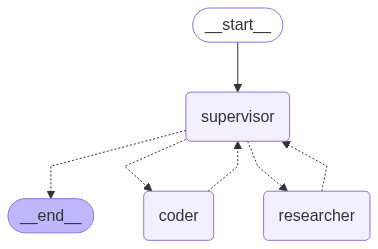

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
for s in app.stream({"messages": [("user", "What's the square root of 42?")]}, subgraphs=True):
    print(s)
    print("**********BELOW IS MY STATE***************")

**********BELOW IS MY GOTO***************
researcher
((), {'supervisor': {'next': 'researcher'}})
**********BELOW IS MY STATE***************
(('researcher:b6df1dff-a2e0-af4d-fde1-c8c56dc76ecd',), {'agent': {'messages': [AIMessage(content='The square root of 42 is approximately 6.4807.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 414, 'prompt_tokens': 179, 'total_tokens': 593, 'completion_time': 1.856308608, 'prompt_time': 0.011237898, 'queue_time': 0.271612472, 'total_time': 1.867546506}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_e98d30d035', 'finish_reason': 'stop', 'logprobs': None}, id='run--8664888e-2e14-4f76-a6ab-731b9fd81494-0', usage_metadata={'input_tokens': 179, 'output_tokens': 414, 'total_tokens': 593})]}})
**********BELOW IS MY STATE***************
((), {'researcher': {'messages': [HumanMessage(content='The square root of 42 is approximately 6.4807.', additional_kwargs={}, response_metadata={}, name='research

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': ''}}

In [ ]:
result=app.invoke({"messages": [("user", "what is an efficent python code to get prime number?")]}, subgraphs=True)

**********BELOW IS MY GOTO***************
coder
**********BELOW IS MY GOTO***************
researcher
**********BELOW IS MY GOTO***************
coder


BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': ''}}

In [ ]:
result=app.ainvoke({"messages": [("user", "what is an efficent python code to get prime number?")]}, subgraphs=True)